In [25]:
import sys
from os import path
_up_one = path.abspath('../')
if _up_one not in sys.path:
    sys.path.insert(1, _up_one)

# Third-party
from astropy.io import ascii
import astropy.coordinates as coord
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from lg_barycentric import LocalGroupBarycentric

In [26]:
nearby = ascii.read('../data/NearbyGalaxies.dat', delimiter=',')

In [27]:
c = coord.SkyCoord(ra=nearby['RA'],
                   dec=nearby['Dec'],
                   distance=coord.Distance(distmod=nearby['distmod']),
                   unit=(u.hourangle, u.deg))

In [28]:
c_barycen = c.transform_to(LocalGroupBarycentric(mw_mass=1E12*u.Msun,
                                                 m31_mass=2.5E12*u.Msun))

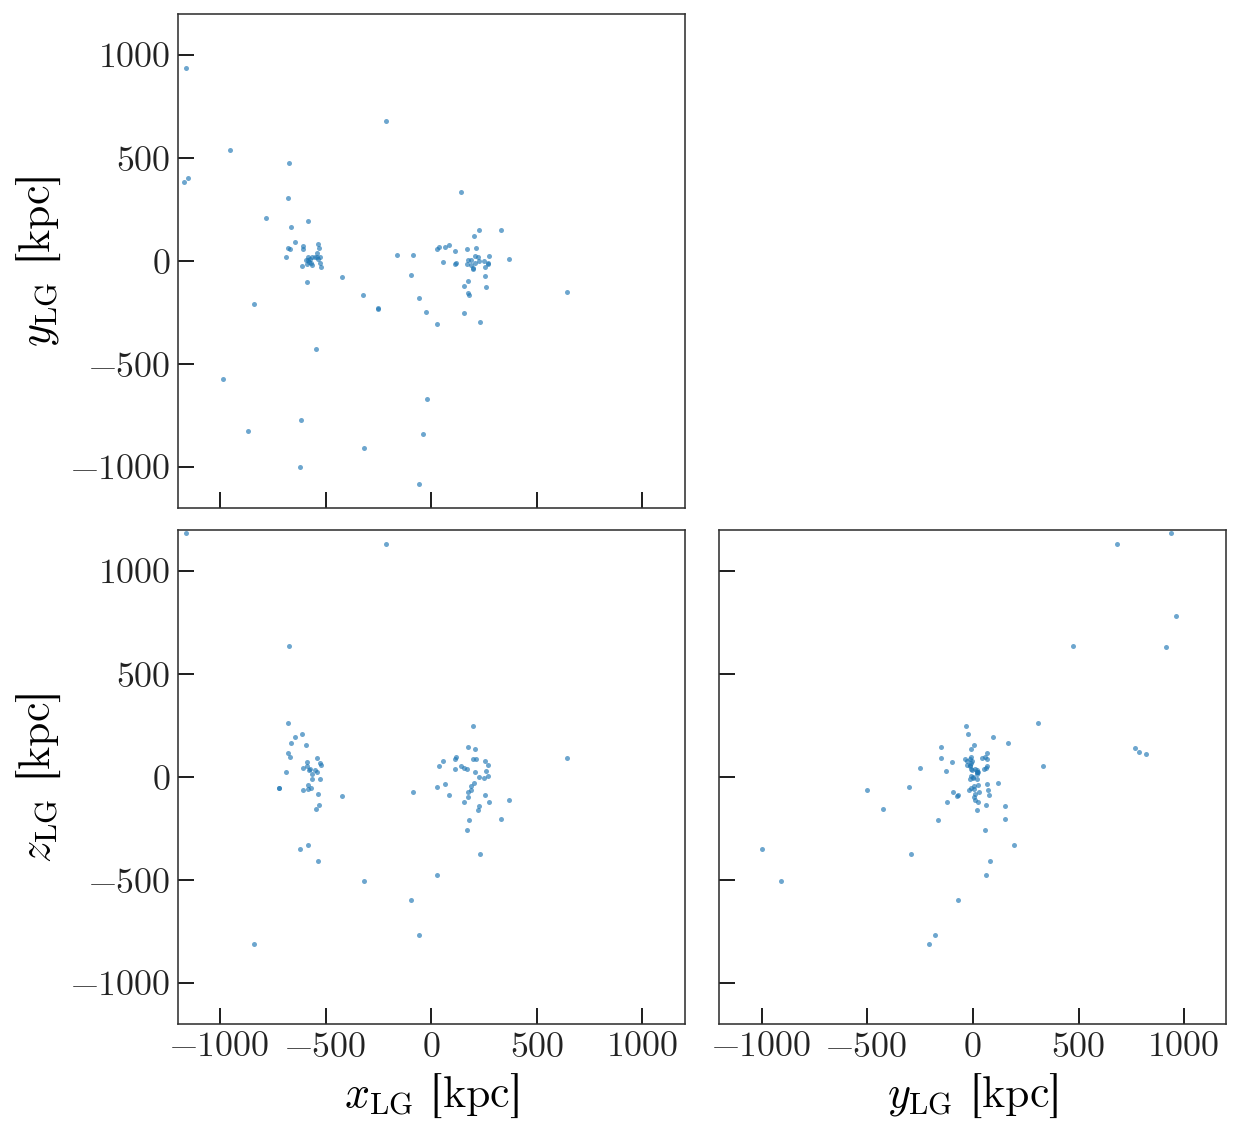

In [29]:
style = dict(marker='.', linestyle='none', alpha=0.65)

fig, axes = plt.subplots(2, 2, figsize=(8.75,8), sharex=True, sharey=True)

axes[0,0].plot(c_barycen.cartesian.xyz[0],
               c_barycen.cartesian.xyz[1],
               **style)
axes[1,0].plot(c_barycen.cartesian.xyz[0],
               c_barycen.cartesian.xyz[2],
               **style)
axes[1,1].plot(c_barycen.cartesian.xyz[1],
               c_barycen.cartesian.xyz[2],
               **style)

axes[0,0].set_xlim(-1200, 1200)
axes[0,0].set_ylim(-1200, 1200)

axes[0,0].set_ylabel(r'$y_{\rm LG}$ [kpc]')
axes[1,0].set_ylabel(r'$z_{\rm LG}$ [kpc]')
axes[1,0].set_xlabel(r'$x_{\rm LG}$ [kpc]')
axes[1,1].set_xlabel(r'$y_{\rm LG}$ [kpc]')

axes[0,0].xaxis.set_ticks(np.arange(-1000, 1000+1, 500))
axes[0,0].yaxis.set_ticks(axes[0,0].get_xticks())

axes[0,1].set_visible(False)

fig.tight_layout()